# PCA from similarity matrices

In [2]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")
from src.utils import models_to_architecture_mapping
os.chdir(current_file_dir)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def plot_pca(df, title, output_filename=None, models_to_architecture_mapping=models_to_architecture_mapping):
    df_distances = 1 - df
    pca = PCA(n_components=2)
    pca.fit(df_distances)
    df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

    df_distances_pca['architecture'] = df_distances_pca.index.map(models_to_architecture_mapping)
    pc1_min_max, pc2_min_max = (df_distances_pca[['PC1']].max().values[0] - df_distances_pca[['PC1']].min()).values[0], (df_distances_pca[['PC2']].max().values[0] - df_distances_pca[['PC2']].min()).values[0]
    plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'], c=df_distances_pca['architecture'].map({'transformer': 'blue', 'CNN': 'red'}))
    for i, txt in enumerate(df_distances_pca.index):
        plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+pc1_min_max*0.01, df_distances_pca['PC2'].iloc[i]+pc2_min_max*0.01))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='transformer', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='CNN', markerfacecolor='red', markersize=10)
    ])
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()


In [4]:
similarity_matriced_csvs = [f for f in os.listdir('.') if f.endswith('.csv') and f.startswith('similarity_matrix')]
similarity_matriced_csvs

['similarity_matrix_gradcam_cosine.csv',
 'similarity_matrix_gradcam_cosine_only_matching.csv',
 'similarity_matrix_gradcam_rbf.csv',
 'similarity_matrix_gradcam_rbf_only_matching.csv']

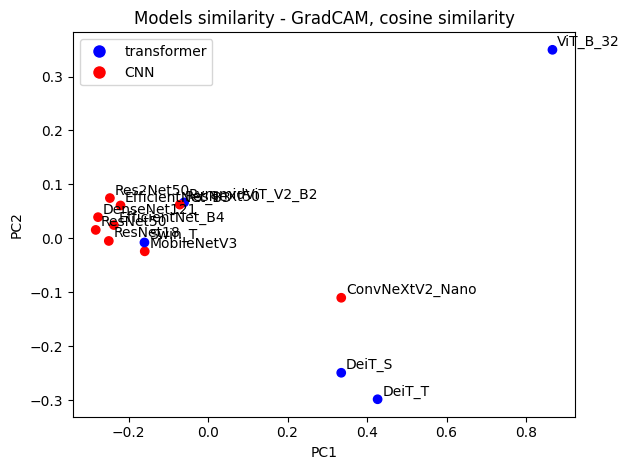

In [5]:
df = pd.read_csv(similarity_matriced_csvs[0], index_col=0)
plot_pca(df, title="Models similarity - GradCAM, cosine similarity")

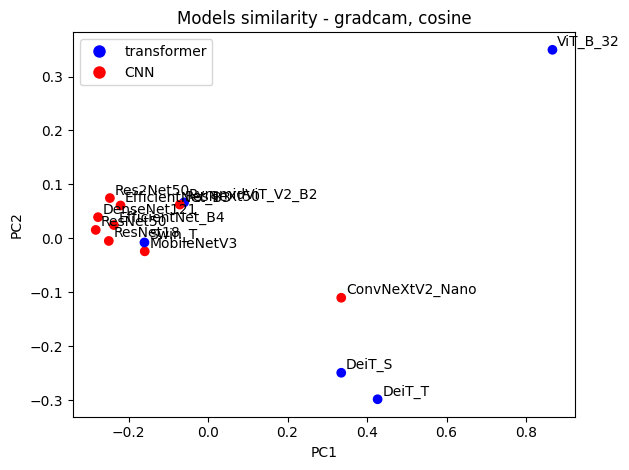

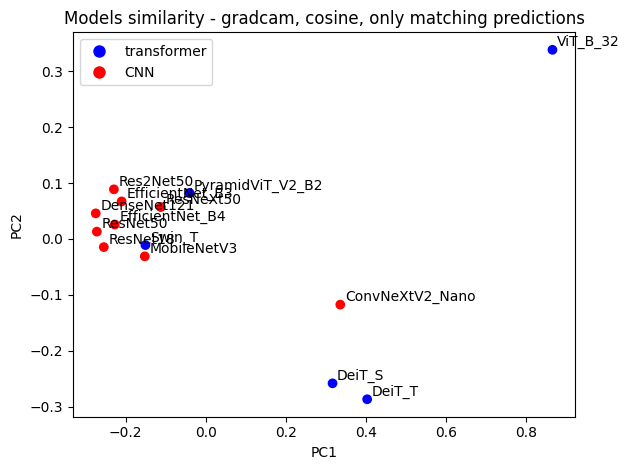

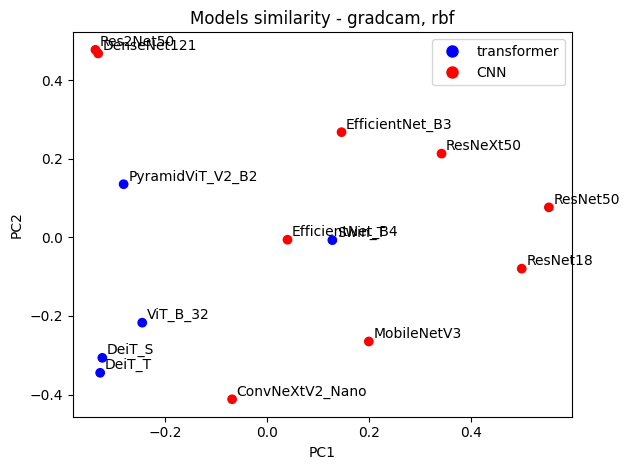

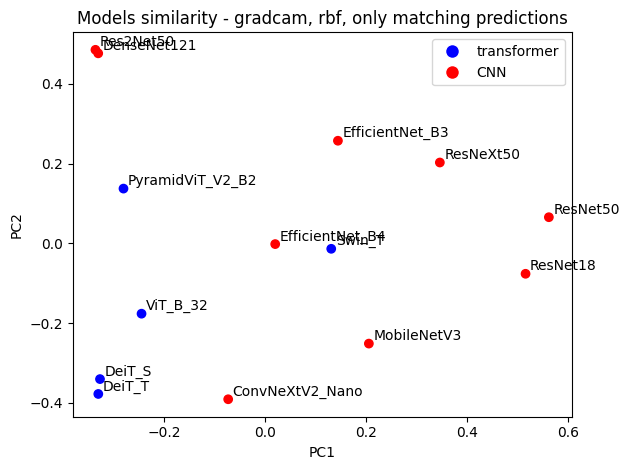

In [6]:
for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Models similarity - {explanation_method}, {similarity_metric}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'pca_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'pca_{explanation_method}_{similarity_metric}_all.png'
    df = pd.read_csv(csv_name, index_col=0)
    plot_pca(df, title=title, output_filename=output_filename)

## Heatmaps of similarities

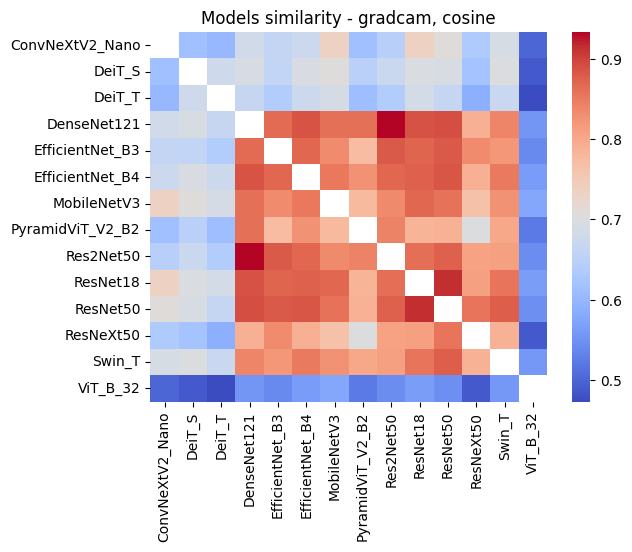

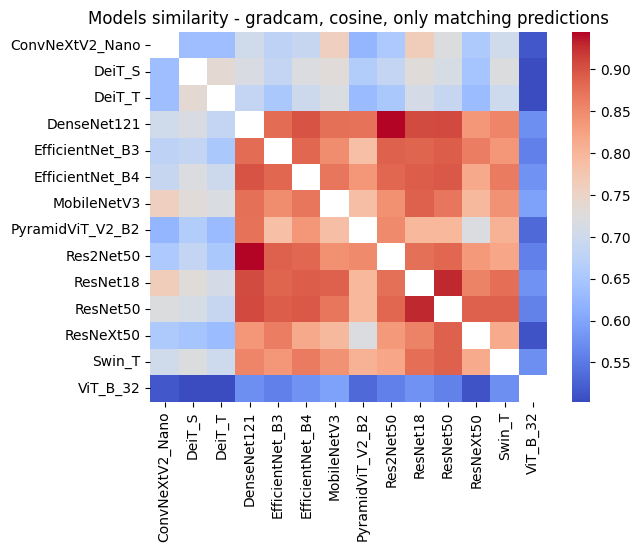

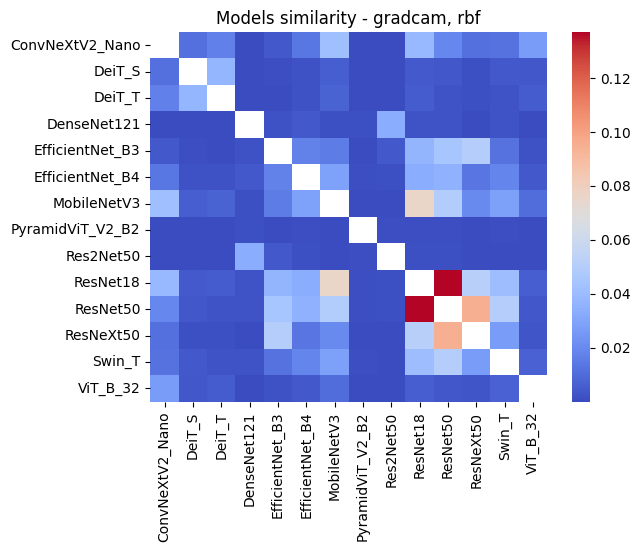

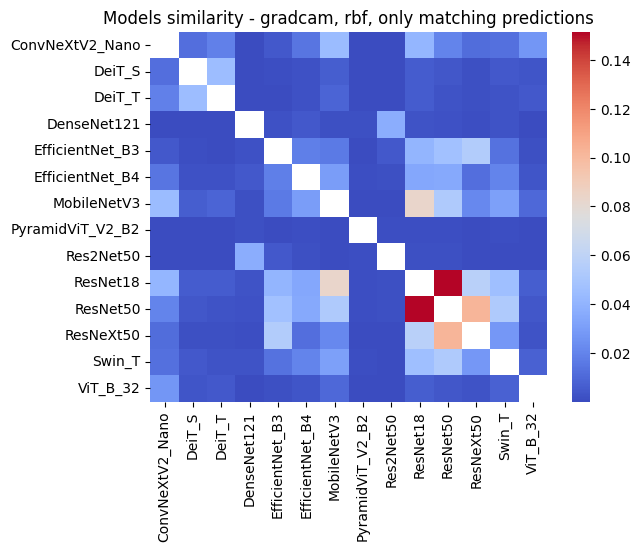

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot heatmap
def plot_heatmap(df, title):
    mask = np.eye(df.shape[0], dtype=bool)
    sns.heatmap(df, mask=mask, cmap='coolwarm')
    plt.title(title)
    plt.show()

for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Models similarity - {explanation_method}, {similarity_metric}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
    df = pd.read_csv(csv_name, index_col=0)
    plot_heatmap(df, title=title)

# Community detection - Louvain

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_partitions, louvain_communities

df = pd.read_csv(similarity_matriced_csvs[3], index_col=0)

# Remove diagonal and create graph
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
df

,ConvNeXtV2_Nano,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,MobileNetV3,PyramidViT_V2_B2,Res2Net50,ResNet18,ResNet50,ResNeXt50,Swin_T,ViT_B_32
ConvNeXtV2_Nano,0.000000,0.012248,0.018937,0.000015,0.004295,0.014274,0.044376,0.000252,0.000009,0.040986,0.019818,0.011833,0.013006,0.026904
DeiT_S,0.012248,0.000000,0.044407,0.000050,0.000815,0.001989,0.006178,0.000080,0.000062,0.005506,0.003586,0.001560,0.004366,0.003532
DeiT_T,0.018937,0.044407,0.000000,0.000003,0.000506,0.002197,0.008371,0.000016,0.000004,0.005669,0.002847,0.001250,0.002882,0.004345
DenseNet121,0.000015,0.000050,0.000003,0.000000,0.002351,0.004159,0.001317,0.001517,0.036961,0.002497,0.002265,0.000601,0.002461,0.000141
EfficientNet_B3,0.004295,0.000815,0.000506,0.002351,0.000000,0.017842,0.016386,0.000310,0.004473,0.040390,0.046847,0.054120,0.013276,0.001770
EfficientNet_B4,0.014274,0.001989,0.002197,0.004159,0.017842,0.000000,0.030021,0.001021,0.001481,0.034008,0.034922,0.012188,0.020036,0.003004
MobileNetV3,0.044376,0.006178,0.008371,0.001317,0.016386,0.030021,0.000000,0.000312,0.000319,0.083395,0.052859,0.021403,0.031014,0.009756
PyramidViT_V2_B2,0.000252,0.000080,0.000016,0.001517,0.000310,0.001021,0.000312,0.000000,0.000687,0.000750,0.000706,0.000114,0.000976,0.000133
Res2Net50,0.000009,0.000062,0.000004,0.036961,0.004473,0.001481,0.000319,0.000687,0.000000,0.001294,0.001617,0.000512,0.000348,0.000037
ResNet18,0.040986,0.005506,0.005669,0.002497,0.040390,0.034008,0.083395,0.000750,0.001294,0.000000,0.151481,0.057219,0.045835,0.006300


C:\Users\matem\AppData\Local\Temp\ipykernel_6244\205616649.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


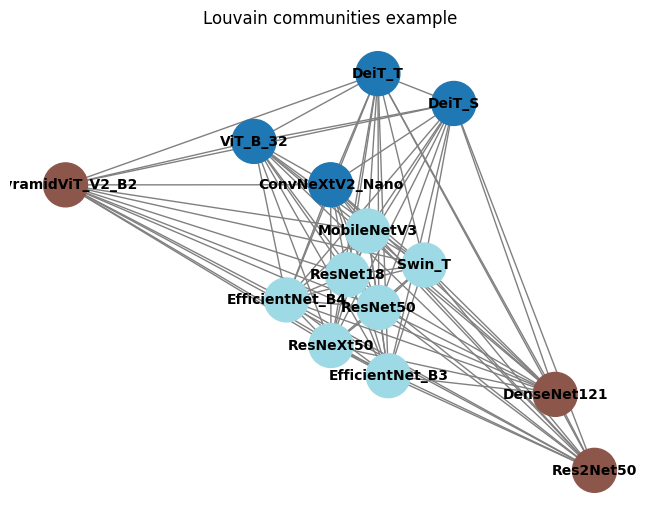

[{'ConvNeXtV2_Nano', 'DeiT_S', 'DeiT_T', 'ViT_B_32'},
 {'DenseNet121', 'PyramidViT_V2_B2', 'Res2Net50'},
 {'EfficientNet_B3',
  'EfficientNet_B4',
  'MobileNetV3',
  'ResNeXt50',
  'ResNet18',
  'ResNet50',
  'Swin_T'}]

In [9]:
def plot_communities(communities, title, output_filename=None):

    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i

    colors = [node_colors[node] for node in G.nodes]
    nx.draw(G, node_color=colors, with_labels=True, cmap=plt.cm.tab20, node_size=1000, font_size=10, font_color='black', edge_color='gray', font_weight='bold')
    plt.title(title)
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()


communities = louvain_communities(G)
plot_communities(communities, title="Louvain communities example")
communities

C:\Users\matem\AppData\Local\Temp\ipykernel_6244\205616649.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


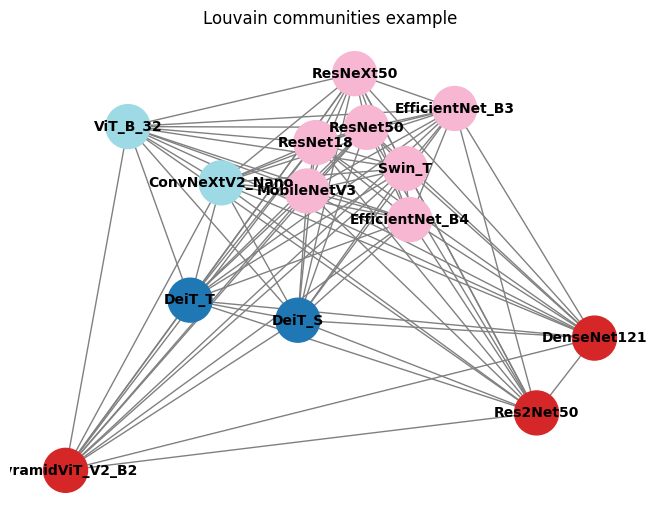

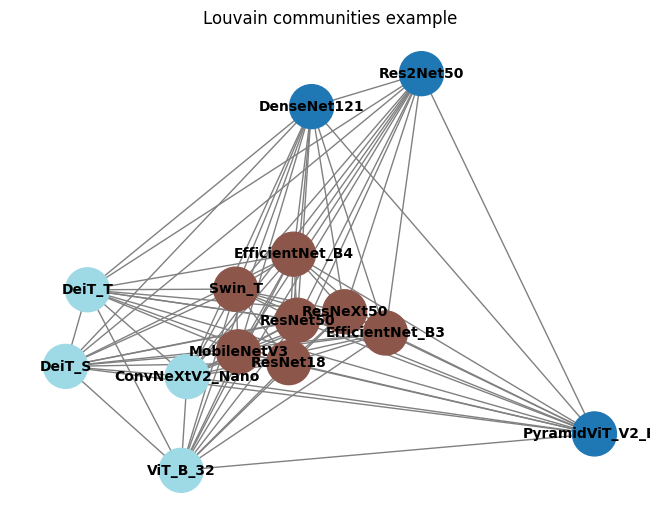

[[{'DeiT_S', 'DeiT_T'},
  {'DenseNet121', 'PyramidViT_V2_B2', 'Res2Net50'},
  {'EfficientNet_B3',
   'EfficientNet_B4',
   'MobileNetV3',
   'ResNeXt50',
   'ResNet18',
   'ResNet50',
   'Swin_T'},
  {'ConvNeXtV2_Nano', 'ViT_B_32'}],
 [{'DenseNet121', 'PyramidViT_V2_B2', 'Res2Net50'},
  {'EfficientNet_B3',
   'EfficientNet_B4',
   'MobileNetV3',
   'ResNeXt50',
   'ResNet18',
   'ResNet50',
   'Swin_T'},
  {'ConvNeXtV2_Nano', 'DeiT_S', 'DeiT_T', 'ViT_B_32'}]]

In [10]:
communities = list(louvain_partitions(G))
for c in communities:
    plot_communities(c, title="Louvain communities example")
communities

C:\Users\matem\AppData\Local\Temp\ipykernel_6244\205616649.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


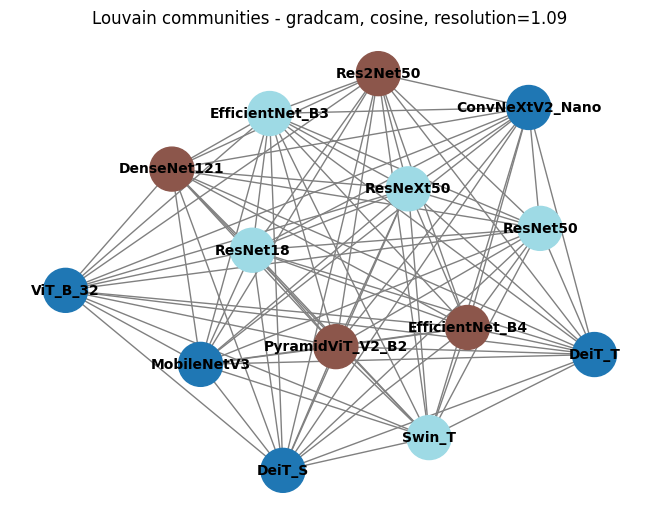

C:\Users\matem\AppData\Local\Temp\ipykernel_6244\205616649.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


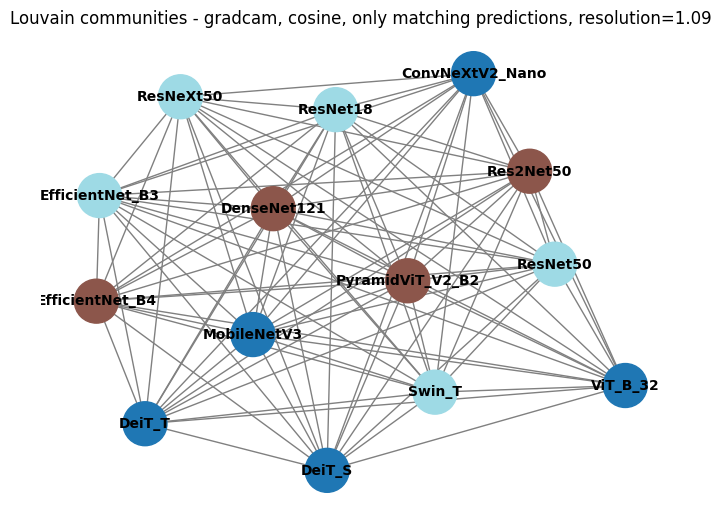

C:\Users\matem\AppData\Local\Temp\ipykernel_6244\205616649.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


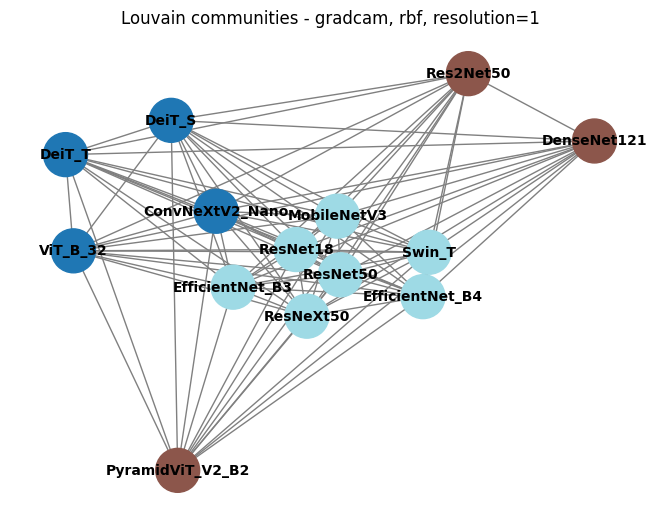

C:\Users\matem\AppData\Local\Temp\ipykernel_6244\205616649.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


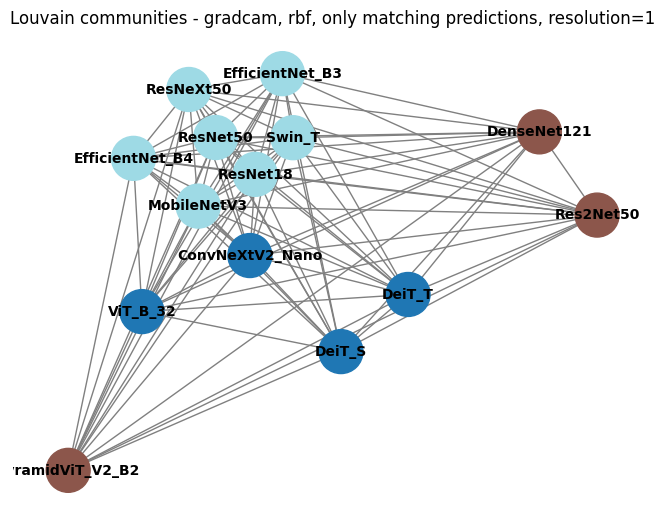

In [11]:
for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Louvain communities - {explanation_method}, {similarity_metric}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_all.png'

    if similarity_metric == 'cosine':
        resolution = 1.09
    else:
        resolution = 1

    df = pd.read_csv(csv_name, index_col=0)
    np.fill_diagonal(df.values, 0)
    G = nx.from_pandas_adjacency(df)
    communities = louvain_communities(G, resolution=resolution)
    plot_communities(communities, title=title + f", resolution={resolution}", output_filename=output_filename)


# Hierarchical clustering

In [12]:
df = pd.read_csv(similarity_matriced_csvs[3], index_col=0)
df

,ConvNeXtV2_Nano,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,MobileNetV3,PyramidViT_V2_B2,Res2Net50,ResNet18,ResNet50,ResNeXt50,Swin_T,ViT_B_32
ConvNeXtV2_Nano,1.000000,0.012248,0.018937,0.000015,0.004295,0.014274,0.044376,0.000252,0.000009,0.040986,0.019818,0.011833,0.013006,0.026904
DeiT_S,0.012248,1.000000,0.044407,0.000050,0.000815,0.001989,0.006178,0.000080,0.000062,0.005506,0.003586,0.001560,0.004366,0.003532
DeiT_T,0.018937,0.044407,1.000000,0.000003,0.000506,0.002197,0.008371,0.000016,0.000004,0.005669,0.002847,0.001250,0.002882,0.004345
DenseNet121,0.000015,0.000050,0.000003,1.000000,0.002351,0.004159,0.001317,0.001517,0.036961,0.002497,0.002265,0.000601,0.002461,0.000141
EfficientNet_B3,0.004295,0.000815,0.000506,0.002351,1.000000,0.017842,0.016386,0.000310,0.004473,0.040390,0.046847,0.054120,0.013276,0.001770
EfficientNet_B4,0.014274,0.001989,0.002197,0.004159,0.017842,1.000000,0.030021,0.001021,0.001481,0.034008,0.034922,0.012188,0.020036,0.003004
MobileNetV3,0.044376,0.006178,0.008371,0.001317,0.016386,0.030021,1.000000,0.000312,0.000319,0.083395,0.052859,0.021403,0.031014,0.009756
PyramidViT_V2_B2,0.000252,0.000080,0.000016,0.001517,0.000310,0.001021,0.000312,1.000000,0.000687,0.000750,0.000706,0.000114,0.000976,0.000133
Res2Net50,0.000009,0.000062,0.000004,0.036961,0.004473,0.001481,0.000319,0.000687,1.000000,0.001294,0.001617,0.000512,0.000348,0.000037
ResNet18,0.040986,0.005506,0.005669,0.002497,0.040390,0.034008,0.083395,0.000750,0.001294,1.000000,0.151481,0.057219,0.045835,0.006300


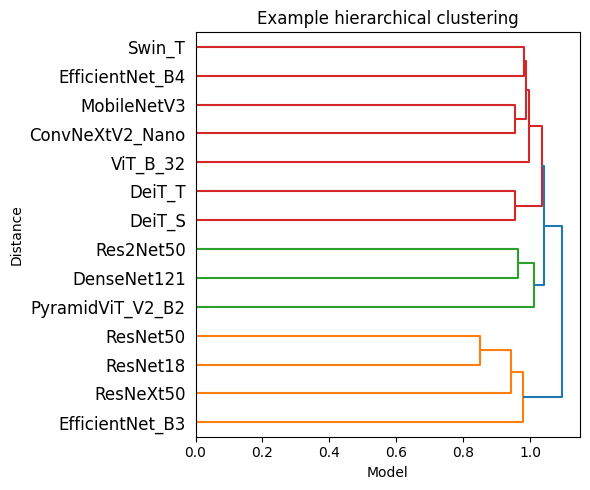

,cluster
ConvNeXtV2_Nano,0
DeiT_S,0
DeiT_T,0
EfficientNet_B4,0
MobileNetV3,0
Swin_T,0
ViT_B_32,0
DenseNet121,1
PyramidViT_V2_B2,1
Res2Net50,1


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

def hierarchical_clustering(df, title, output_filename=None, color_threshold=1.04):
    similarity_matrix = df.values
    distance_matrix = 1 - similarity_matrix
    condensed_dist_matrix = squareform(distance_matrix)
    Z = linkage(condensed_dist_matrix, method='ward')
    plt.figure(figsize=(6, 5))
    dendrogram(Z, labels=df.index, orientation='right', color_threshold=color_threshold) # threshold here matches 3 clusters
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Distance')
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()
    
    # clusters
    clusters = cut_tree(Z, n_clusters=3)
    clusters_df = pd.DataFrame(clusters, index=df.index, columns=['cluster'])
    clusters_df = clusters_df.sort_values(by='cluster')
    
    return Z, clusters_df

Z, clusters = hierarchical_clustering(df, title="Example hierarchical clustering")
clusters


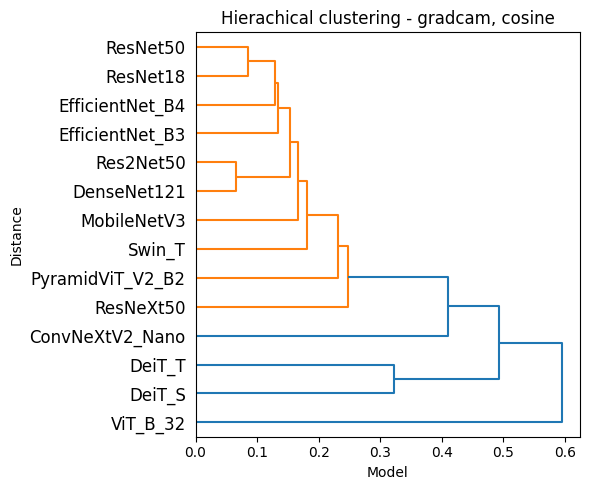

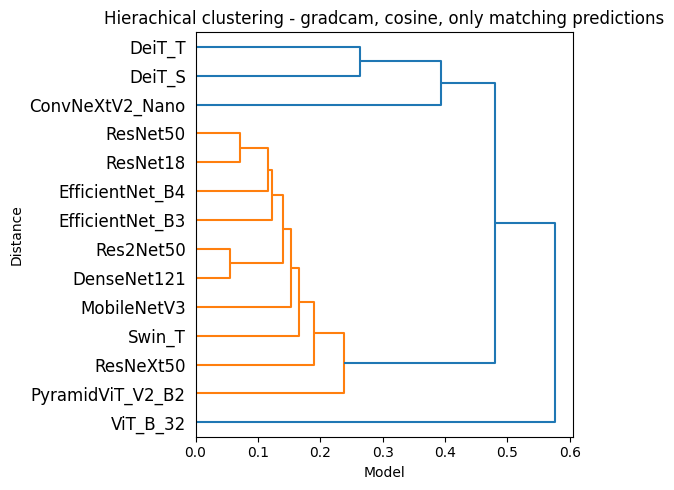

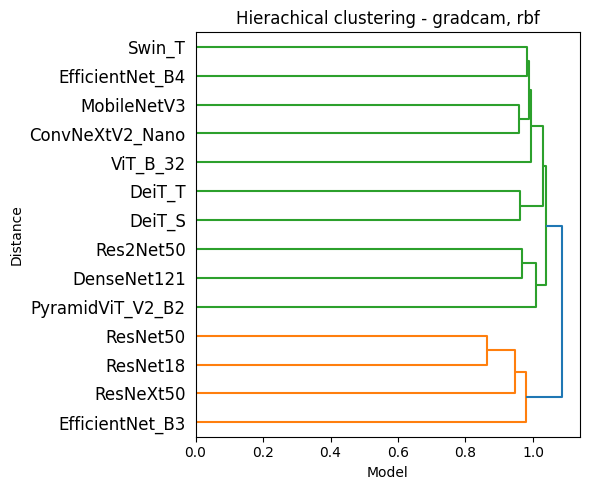

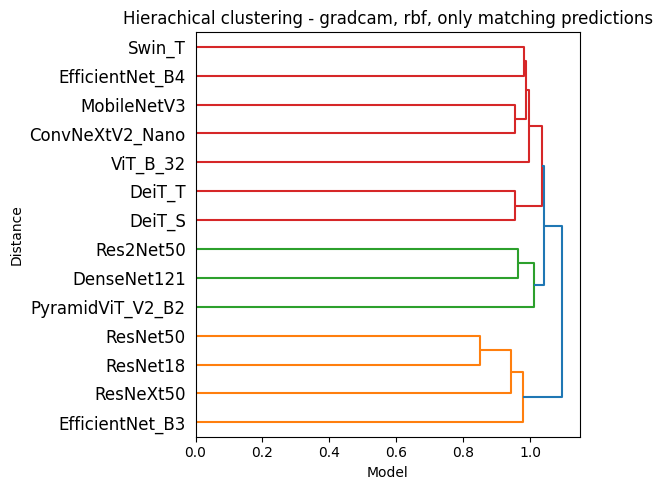

In [14]:
for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Hierachical clustering - {explanation_method}, {similarity_metric}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'dendrogram_hierarchical_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'dendrogram_hierarchical_{explanation_method}_{similarity_metric}_all.png'

    if similarity_metric == 'cosine':
        color_threshold = 0.25
    else:
        color_threshold = 1.04

    df = pd.read_csv(csv_name, index_col=0)
    np.fill_diagonal(df.values, 1)
    Z, clusters = hierarchical_clustering(df, title=title, output_filename=output_filename, color_threshold=color_threshold)